In [1]:
import os
import json
import random
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import numpy as np
import pickle
import pandas as pd
import torch
import torch.nn.functional as F
import re

In [2]:
from modules import (
    get_data_from_trajectory_id,
    create_simple_dataloader,
    Step_1,
    Step_2,
    CombinedHamiltonianLayer,
    SimpleStackedHamiltonianNetwork,
    ReverseStep2,
    ReverseStep1,
    ReverseCombinedHamiltonianLayer,
    InverseStackedHamiltonianNetwork,
    prediction_loss,
    prediction_loss_euclidean,
    load_checkpoint,
    count_parameters,
    hsic_loss_statistics_only,
    hsic_loss
    )

In [3]:
from modules import (    
    calculate_phi_A,
    add_phi_A_columns,
    plot_differencies,
    plot_prediction_vs_ground_truth,
    test_model_in_single_trajectory,
    analyze_means_with_constants,
    visualize_trajectory_movements_with_std_ellipses,
    visualize_epoch_metrics,
    analyze_folders_means,
    analyze_mapping_net,
    test_model_in_all_trajectories_in_df,
    test_model_variance_in_all_trajectories_in_df,
    plot_prediction_losses,
    plot_variance_losses,
    test_model_with_varying_observed_points,
    test_model_variance_with_varying_observed_points,
    compute_jacobian_functional,
    compute_symplectic_product,
    check_canonical_transformation,
    test_canonical_tranformation_on_trajectory,
    )

In [4]:
save_dir_path = "./save_directory_7" 


In [5]:
with open("all_dataframes.pkl", "rb") as f:
    loaded_dfs = pickle.load(f)

# Access them like before:
train_df = loaded_dfs['train_df']
val_df = loaded_dfs['val_df']
test_df = loaded_dfs['test_df']

train_id_df = loaded_dfs['train_id_df']
val_id_df = loaded_dfs['val_id_df']
test_id_df = loaded_dfs['test_id_df']

with open("df_high_energy_revised.pkl", "rb") as f:
    df_high_energy_revised = pickle.load(f)

val_df_high_energy_revised = df_high_energy_revised['val_df_high_energy_revised']
val_id_df_high_energy_revised = df_high_energy_revised['val_id_df_high_energy_revised']

test_df_high_energy_revised = df_high_energy_revised['test_df_high_energy_revised']
test_id_df_high_energy_revised = df_high_energy_revised['test_id_df_high_energy_revised']

In [6]:
train_id_df_added = add_phi_A_columns(train_id_df)
val_id_df_added = add_phi_A_columns(val_id_df)
val_id_df_high_energy_revised_added = add_phi_A_columns(val_id_df_high_energy_revised)


📊 Metric summaries:
  Lowest loss of metric 'val_prediction_loss_' recorded in epoch 911 with the value: 5.985752, the losses of the last 5 epochs are: [6.027783751487732, 6.01736984650294, 6.015262047449748, 5.9925200541814165, 5.996931294600169]
  Lowest loss of metric 'train_variance_loss_' recorded in epoch 913 with the value: 48.805517, the losses of the last 5 epochs are: [49.02527677651608, 49.087448293512516, 48.93139269857696, 48.91818844188344, 48.83018997943763]
  Lowest loss of metric 'train_prediction_loss_' recorded in epoch 903 with the value: 6.086238, the losses of the last 5 epochs are: [6.146184643109639, 6.188979387283325, 6.2447848536751485, 6.200679349176811, 6.171382625897725]
  Lowest loss of metric 'val_variance_loss_training_set' recorded in epoch 906 with the value: 48.658902, the losses of the last 5 epochs are: [48.76841821273168, 48.907201796770096, 48.752185781796776, 48.70583794514338, 48.74957431356112]
  Lowest loss of metric 'val_prediction_loss_trai

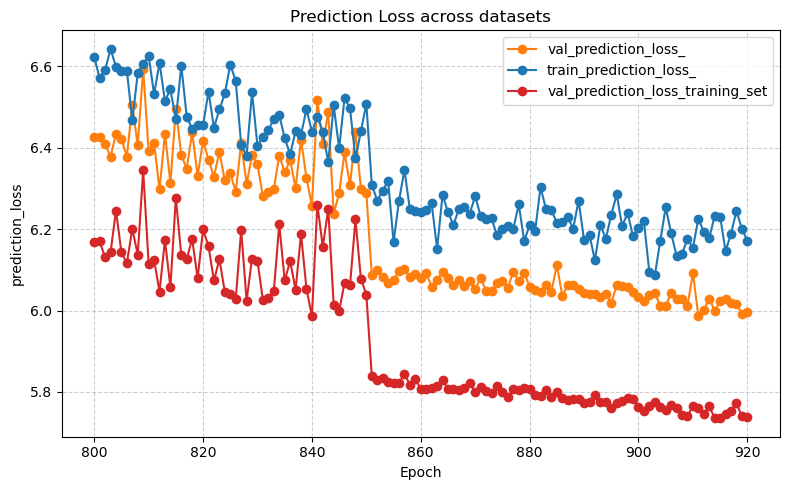

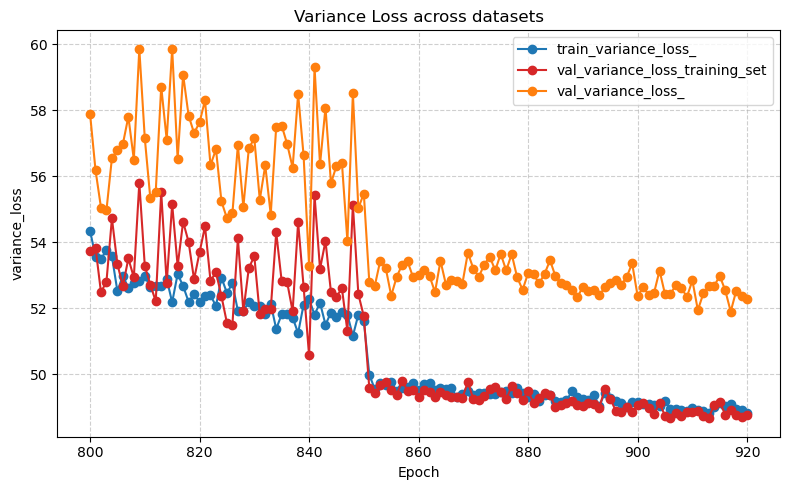

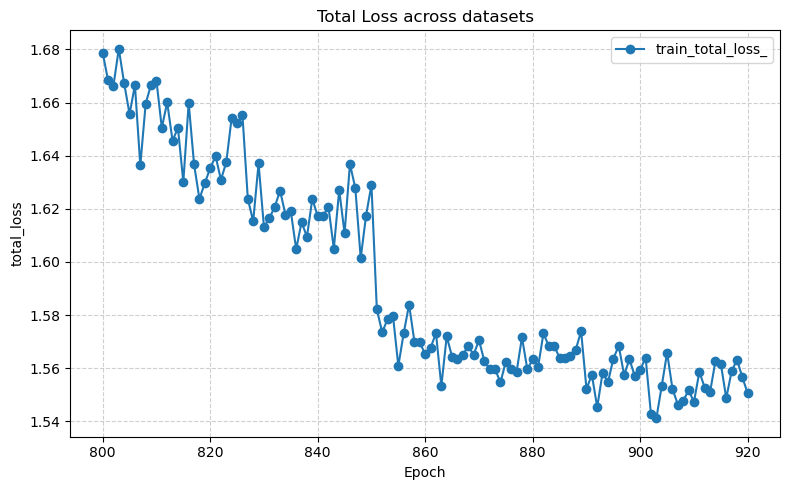

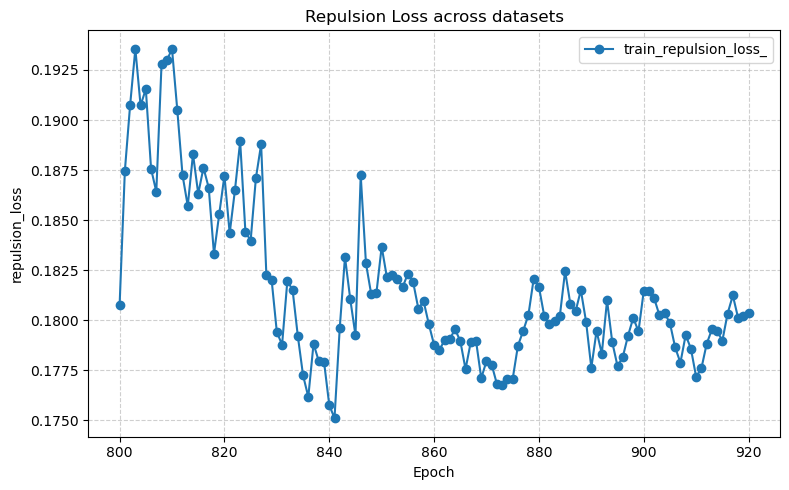

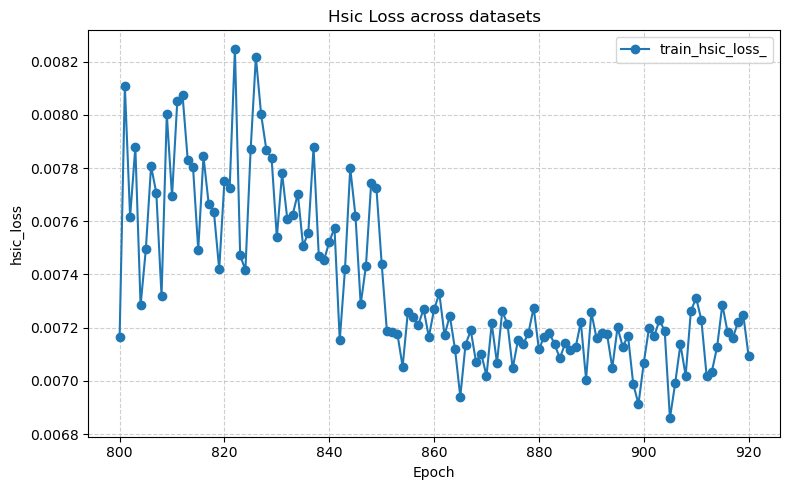

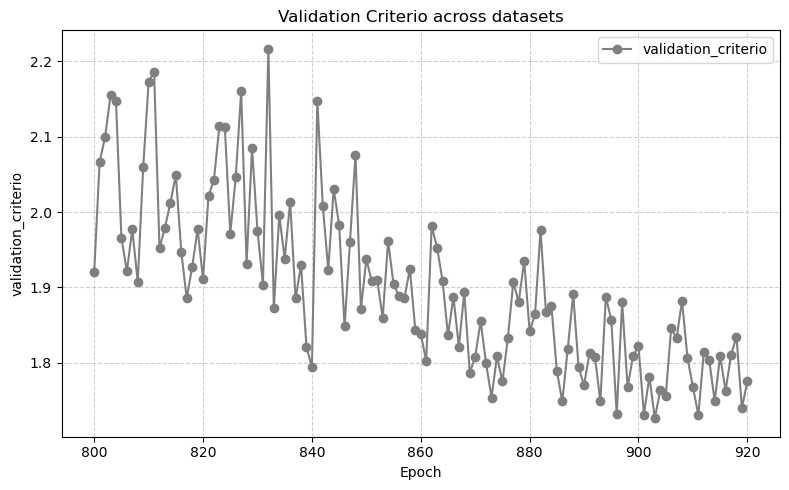

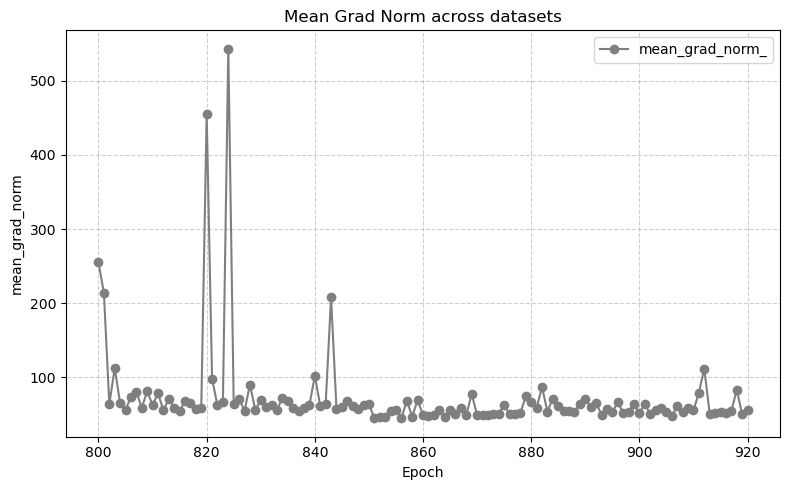

In [31]:
visualize_epoch_metrics(
 save_dir_path,
["val_prediction_loss_", "train_variance_loss_", "train_prediction_loss_", "val_variance_loss_training_set", "val_prediction_loss_training_set",  "val_variance_loss_", "train_total_loss_", "train_repulsion_loss_", "train_hsic_loss_" , "validation_criterio", "mean_grad_norm_"],
plot_on_same_graph=True,
verbose=True,
specific_epochs=[800,"last"]
)




📊 Processing directory: val_trajectories_data

For the epoch_850 in val_trajectories_data the values are:
92: X_mean = 7.5401 ± 4.6558, U_mean = -13.5801 ± 5.5518 and A=13.564677634903196, phi=-2.7802771843251053
64: X_mean = 5.5607 ± 3.8834, U_mean = -11.9749 ± 4.4809 and A=11.313750136394223, phi=-2.8600808883112765
6: X_mean = 3.6796 ± 4.4689, U_mean = -4.7791 ± 2.4103 and A=3.4643759649388923, phi=0.5272390069263062

📊 Processing directory: val_train_set_trajectories_data

For the epoch_850 in val_train_set_trajectories_data the values are:
2: X_mean = -1.9619 ± 2.9363, U_mean = -8.0034 ± 1.2197 and A=2.0004916751010886, phi=-1.322539930867642
120: X_mean = -1.1278 ± 7.7173, U_mean = 0.1019 ± 6.5847 and A=15.491933918298438, phi=-0.3577443145058989
96: X_mean = 2.6423 ± 5.5026, U_mean = 0.4204 ± 6.0482 and A=13.856421371448707, phi=0.050548714589954684

📊 Processing directory: val_high_energy_trajectories_data

For the epoch_850 in val_high_energy_trajectories_data the values are:

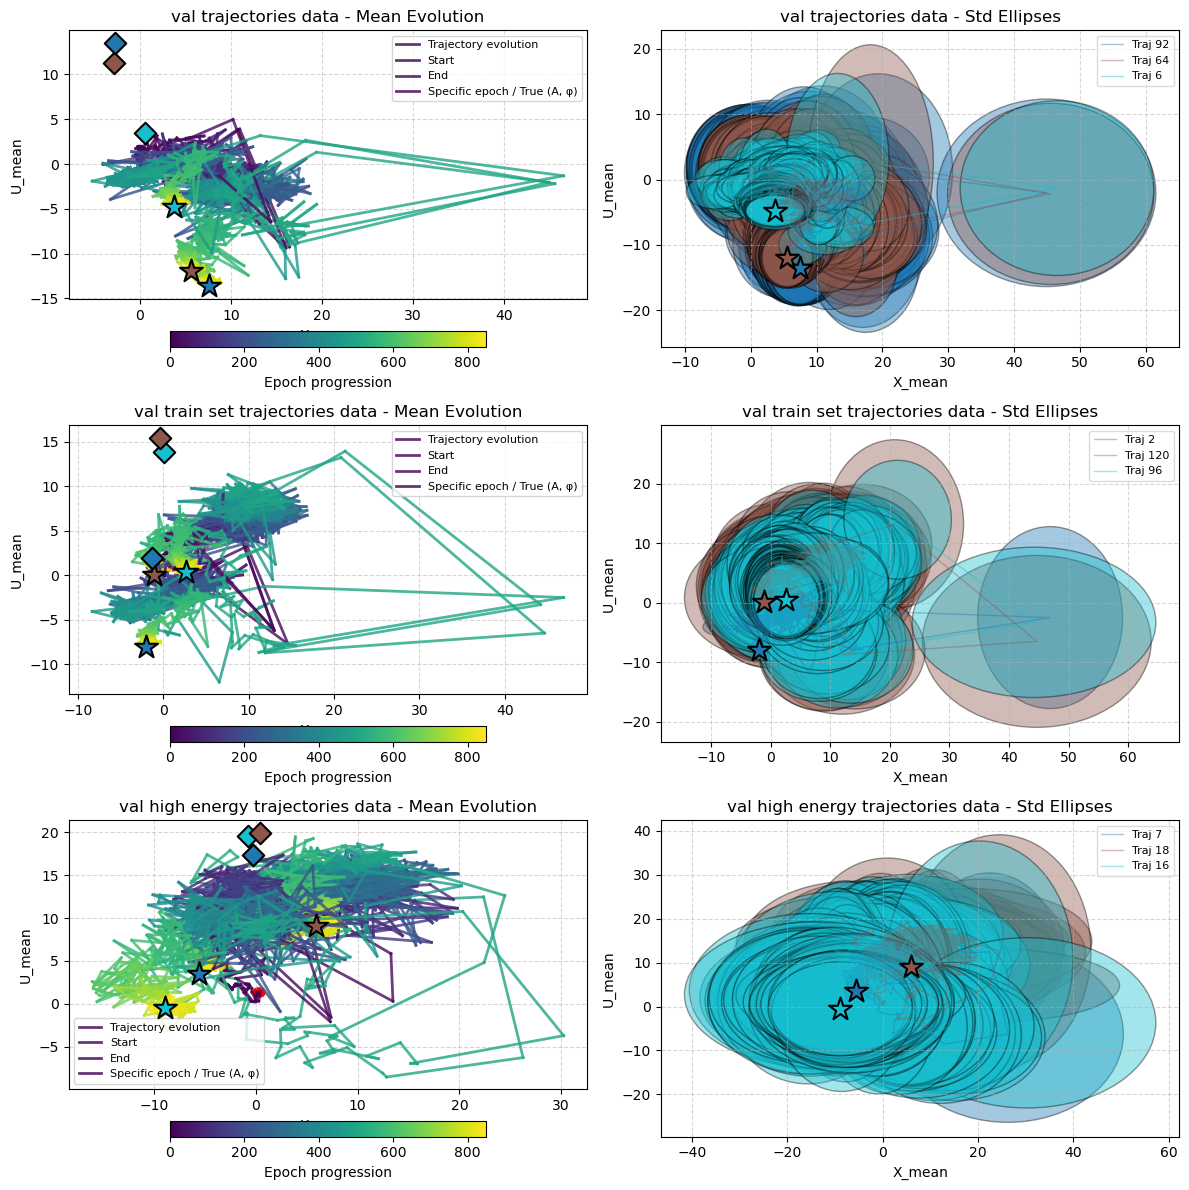


✅ Mean + Std (ellipse) visualization complete.


In [31]:
visualize_trajectory_movements_with_std_ellipses(save_dir_path, number_of_points_to_plot=3, right_plot_alpha=0.4, verbose=True, specific_epoch = "last", visualize_true_constants=True,train_id_df_added=train_id_df_added,val_id_df_added=val_id_df_added,val_id_df_high_energy_added=val_id_df_high_energy_revised_added)

In [32]:
val_differencies_df, val_train_differencies_set_df, val_high_energy_differencies_df = analyze_means_with_constants(
    save_dir_path=save_dir_path,
    specific_epoch="last",
    train_id_df_added=train_id_df_added,
    val_id_df_added=val_id_df_added,
    val_id_df_high_energy_added=val_id_df_high_energy_revised_added
)

📂 Using data from epoch: epoch_850
✅ Data extraction complete.


In [33]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['A']),
    y=torch.Tensor(val_train_differencies_set_df['phi']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.)

In [34]:
hsic_loss_statistics_only(
    x=torch.Tensor(val_train_differencies_set_df['X_mean']),
    y=torch.Tensor(val_train_differencies_set_df['U_mean']),
    sigma_x = -1,
    sigma_y = -1,
    use_unbiased = True,
    epsilon = 1e-10)

tensor(0.0038)

0.0657

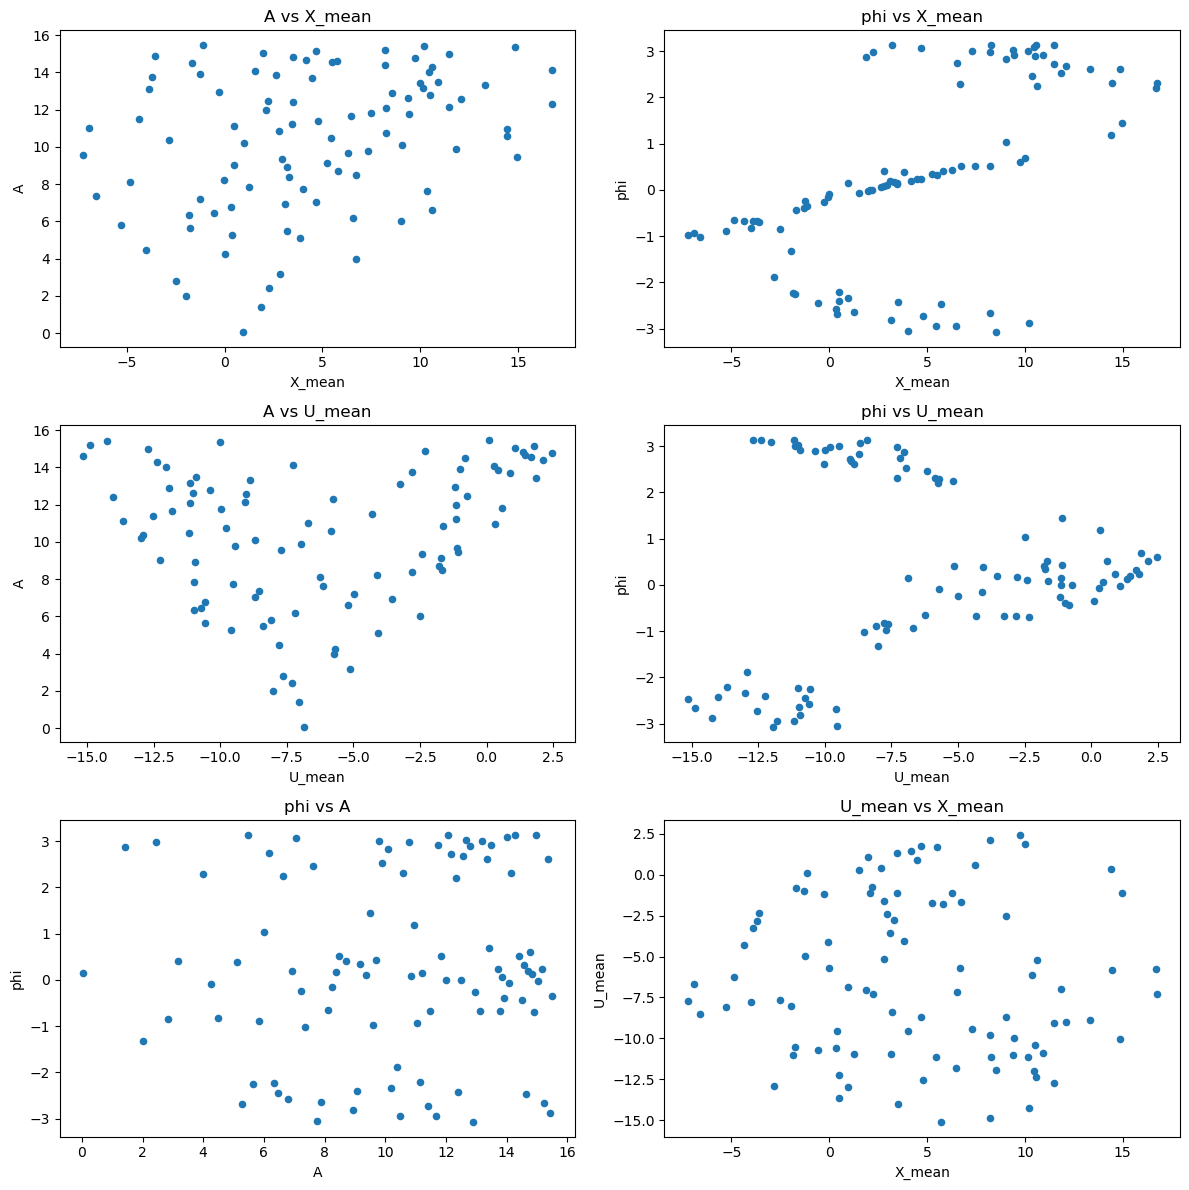

In [35]:
plot_differencies(val_train_differencies_set_df)

📊 Analyzing 105 epochs across 3 directories...

📁 Processing directory: val_trajectories_data

📁 Processing directory: val_train_set_trajectories_data

📁 Processing directory: val_high_energy_trajectories_data


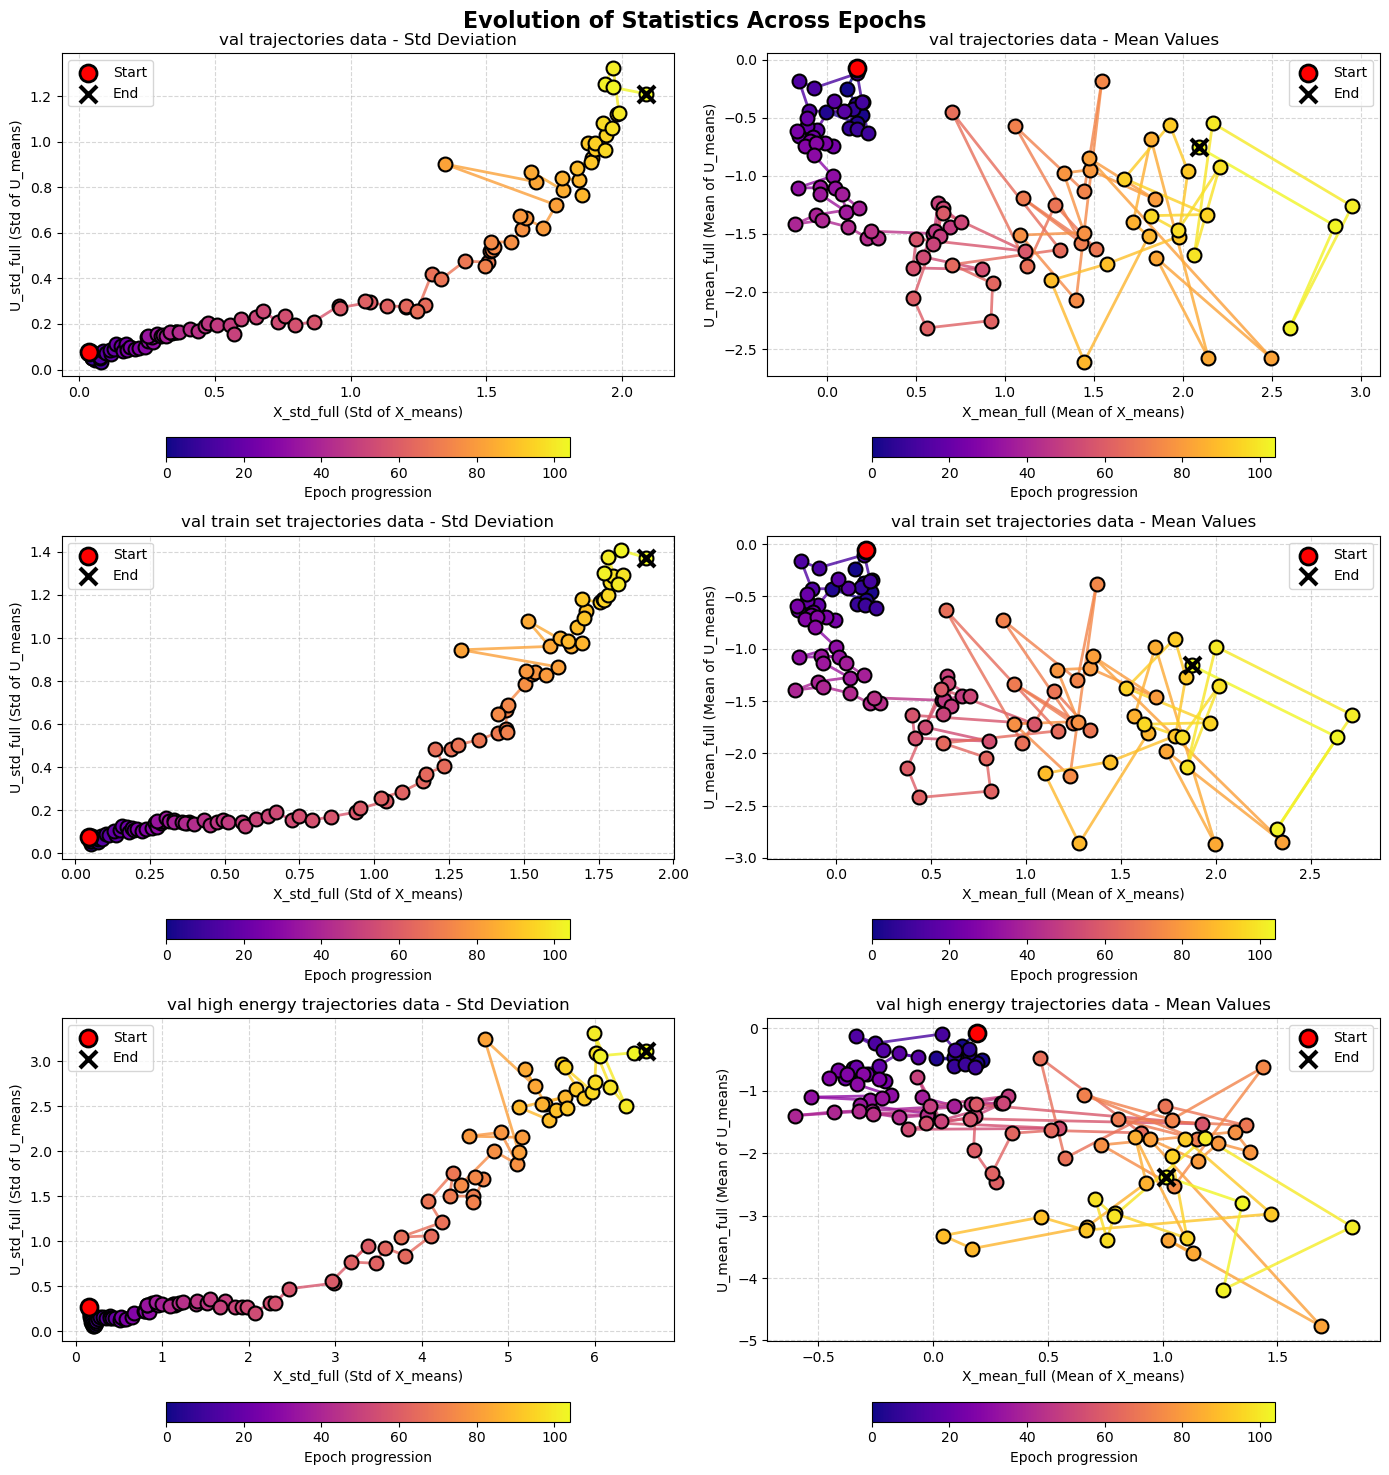

In [35]:
analyze_folders_means(save_dir_path, locate_epoch=None)

In [9]:
device = "cuda"
mapping_net = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
    n_layers=10,
        # MLP Architecture parameters
    hidden_dims= [10, 20, 10],
    n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
    activation = 'gelu',
    activation_params = None,
    final_activation = None,   #Final layer activation function
    #final_activation_only_on_final_layer = True,
    tanh_wrapper = False,
        
        # Initialization parameters
    weight_init = 'orthogonal',
    weight_init_params = {'gain': 1},
    bias_init = 'zeros',
    bias_init_value = 0.0,
        
        
        # Architectural choices
    use_bias = True,
    use_layer_norm = False,
    
    # Input/Output parameters
    input_dim = 2,  # x or u and t
    output_dim = 1,  # scalar G or F
    a_eps_min= 0.5,  # Minimum value for a
    a_eps_max= 2,  # Maximum value for a  
    a_k= 0.1,

    step_1_a_mean_innit= 1.2,
    step_2_a_mean_innit= 1.2,
    std_to_mean_ratio_a_mean_init= 0.0,

    step_1_gamma_mean_innit= 0.5,
    step_2_gamma_mean_innit= 0.5,
    std_to_mean_ratio_gamma_mean_init= 0.0,

    step_1_c1_mean_innit= 0.0,
    step_2_c1_mean_innit= 0.0,
    std_to_mean_ratio_c1_mean_init= 1.0,

    step_1_c2_mean_innit= 0.0,
    step_2_c2_mean_innit= 0.0,
    std_to_mean_ratio_c2_mean_init= 1.0,

    bound_innit=0.0,
).to(device)

checkpoint_path = os.path.join(save_dir_path, "best_model.pt")

load_checkpoint(path=checkpoint_path, mapping_net=mapping_net, device=device, optimizer=None, scheduler=None)

inverse_net = InverseStackedHamiltonianNetwork(forward_network=mapping_net)


Successfully loaded model
Created inverse network with 10 reverse layers


/home/thomasdev/Desktop/Hamilton_Jacobi_NN/Hamilton_Jacobi_NN/modules.py:4053: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path, map_location=devic

In [10]:
test_canonical_tranformation_on_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, compute_jacobian_functional_function=compute_jacobian_functional, compute_symplectic_product_function=compute_symplectic_product, check_canonical_transformation_function=check_canonical_transformation, tolerance=1e-4, test_id_df=val_id_df, test_df=val_df, trajectory_id=50, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

For the mapping network:
Samples [5] failed the canonical test
  Maximum error across all samples: 3.91e-03
For the inverse network:
✓ All 242 transformations are canonical (preserve symplectic structure)!
  Maximum error across all samples: 1.67e-06


In [11]:
count_parameters(mapping_net)

9500

   num_observed_points  mean_loss
0                    1   8.921283
1                    2   7.404505
2                    3   6.201587
3                    4   7.342456
4                    5   7.105437
5                    6   6.123176
6                    7   5.787048
7                    8   5.485857
8                    9   5.274617
9                   10   5.015506


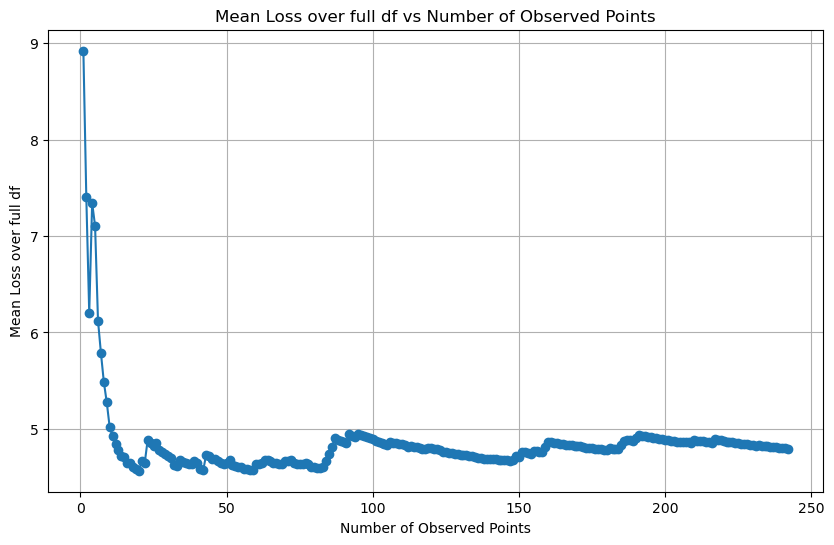

In [12]:
val_loss_per_points_df = test_model_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device)

   num_observed_points  mean_variance
0                    1       0.000000
1                    2       0.879002
2                    3       1.195511
3                    4      27.355677
4                    5      22.840732
5                    6      19.735419
6                    7      16.963785
7                    8      59.969503
8                    9      53.522983
9                   10      48.538586


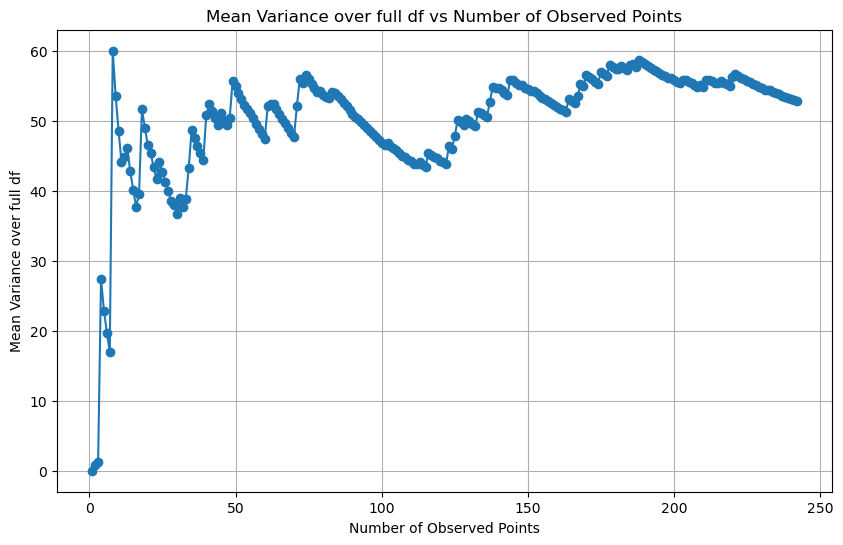

In [13]:
val_variance_per_points_df = test_model_variance_with_varying_observed_points(get_data_from_trajectory_id_function=get_data_from_trajectory_id ,test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net ,device=device)

In [14]:
point_indexes_observed = [0, 30, 60]

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
6                6    6.000950         2.811321              1.147626
11              11   11.000909         2.326988              0.701584
28              28   28.000769         5.111154              0.965904
43              43   43.000645         6.444388              0.982753
50              50   50.000587         4.008142              0.566833
64              64   64.000471         4.254408              0.531799
71              71   71.000413         4.393193              0.521375
85              85   85.000298         5.775887              0.626482
92              92   92.000240         5.606448              0.584512
93              93   93.000231         4.443048              0.460722
103            103  103.000149         5.301489              0.522371
114            114  114.000058         5.641773              0.528400
Mean prediction loss over full dataframe: 4.6765


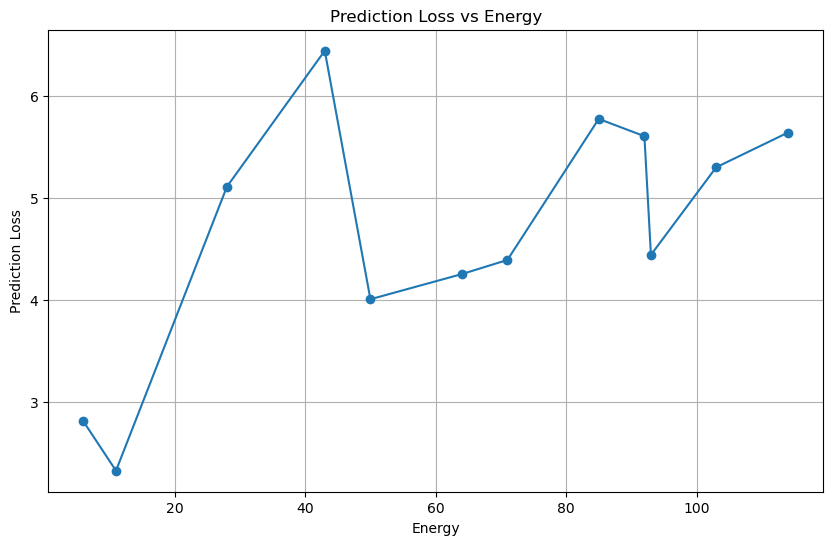

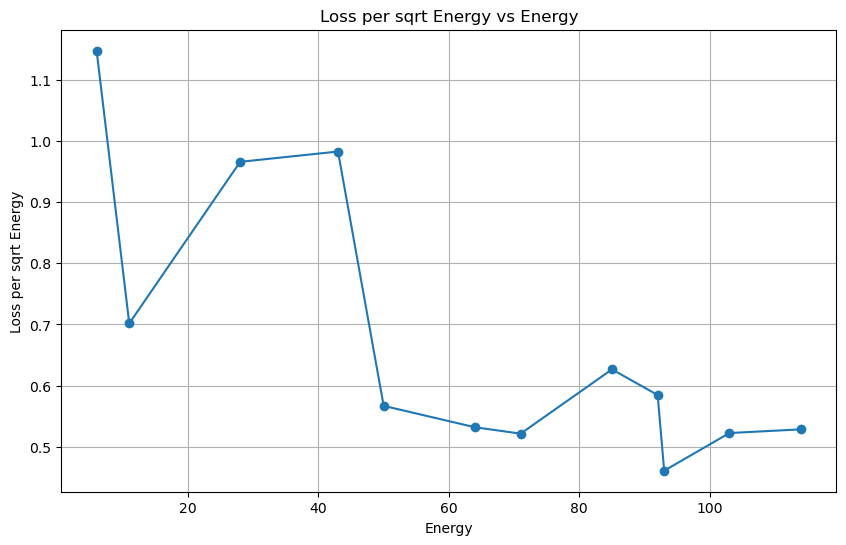

In [15]:
prediction_val_df, mean_prediction_loss_val = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed)

     trajectory_id      energy  variance_loss  variance_per_sqrt_energy
6                6    6.000950       1.001082                  0.408657
11              11   11.000909       2.968037                  0.894860
28              28   28.000769       2.178883                  0.411764
43              43   43.000645       3.056900                  0.466169
50              50   50.000587       1.634881                  0.231206
64              64   64.000471       0.700943                  0.087618
71              71   71.000413       0.157374                  0.018677
85              85   85.000298       0.167526                  0.018171
92              92   92.000240       0.798642                  0.083264
93              93   93.000231       0.853167                  0.088469
103            103  103.000149       0.611101                  0.060214
114            114  114.000058       2.557273                  0.239510
Mean prediction loss over full dataframe: 1.3905


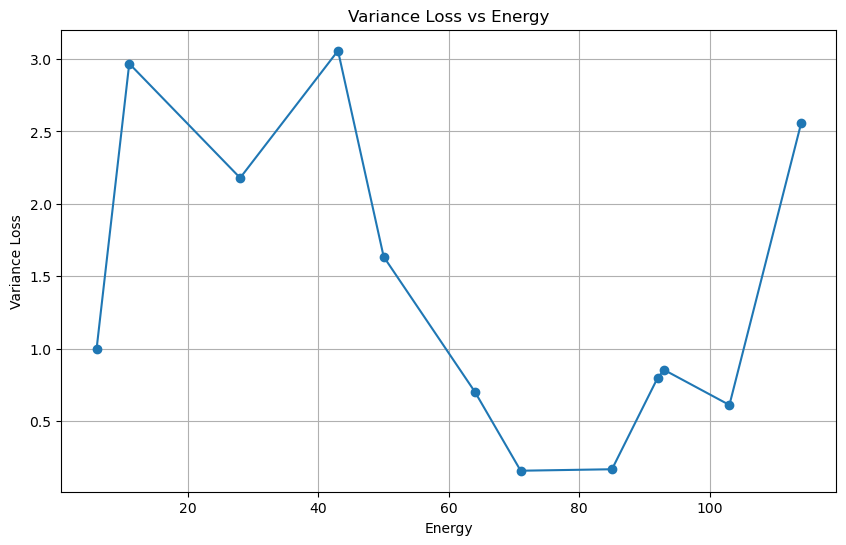

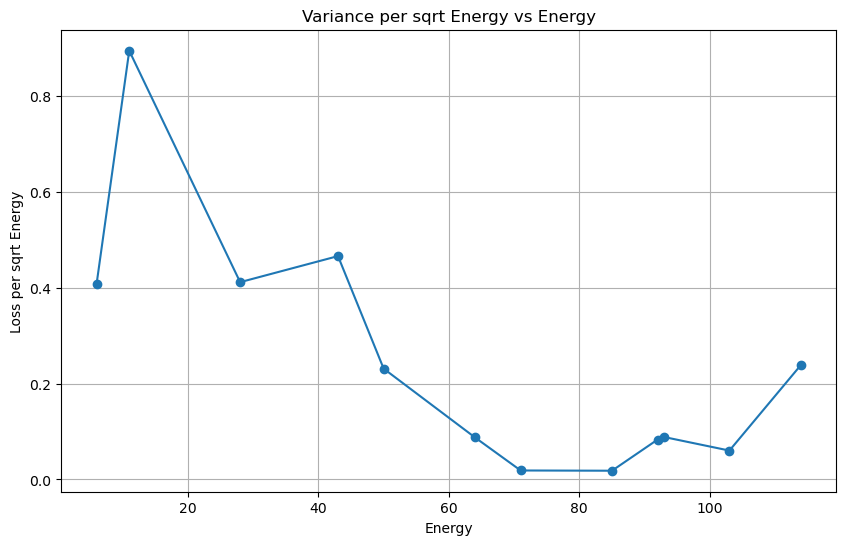

In [16]:
variance_val_df, mean_variance_loss_val = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=val_id_df, test_df=val_df, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


Observed time points: [0.        3.1415927 6.2831855]


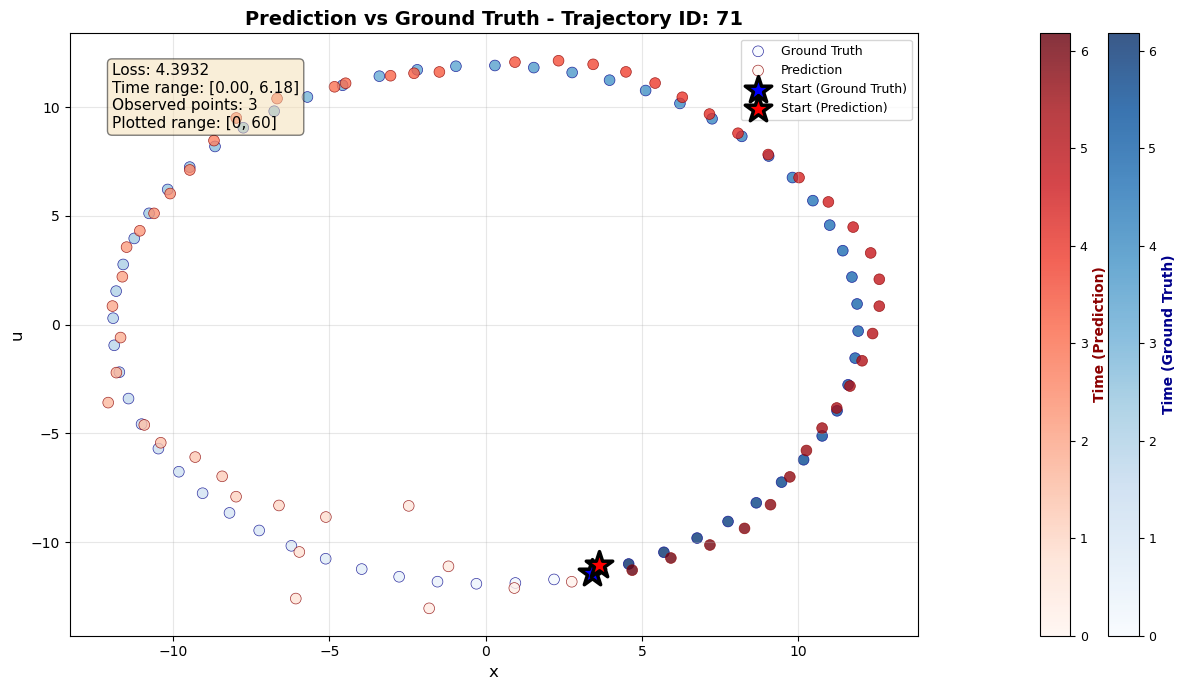

In [27]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=val_id_df, test_df=val_df, trajectory_id=71, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,60])

     trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
7                7    7.000942         2.173524              0.821460
12              12   12.000901         3.531002              1.019274
32              32   32.000736         4.026177              0.711726
37              37   37.000694         3.628005              0.596435
39              39   39.000678         2.843785              0.455366
53              53   53.000562         3.814865              0.524009
57              57   57.000529         8.974638              1.188714
67              67   67.000446         8.676740              1.060029
75              75   75.000380         5.439406              0.628087
81              81   81.000331         5.540770              0.615640
88              88   88.000273         4.437658              0.473055
101            101  101.000165         4.972050              0.494737
117            117  117.000033         5.941827              0.549322
Mean prediction loss

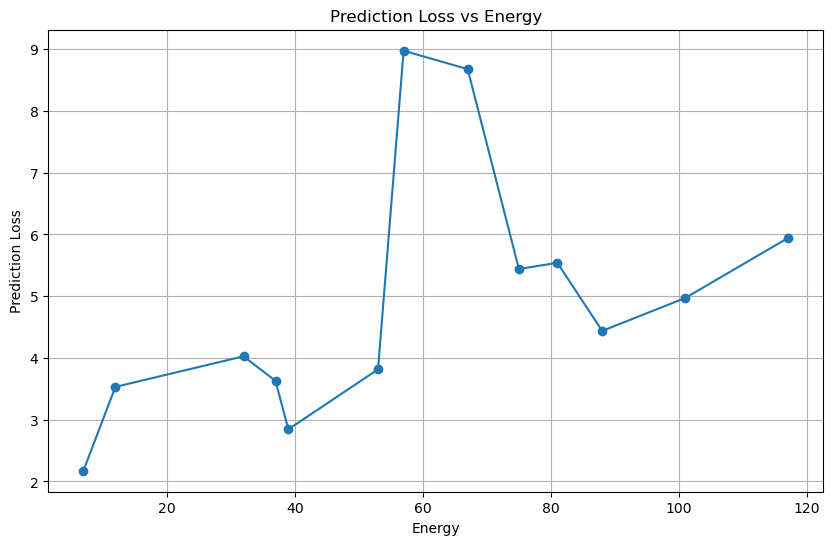

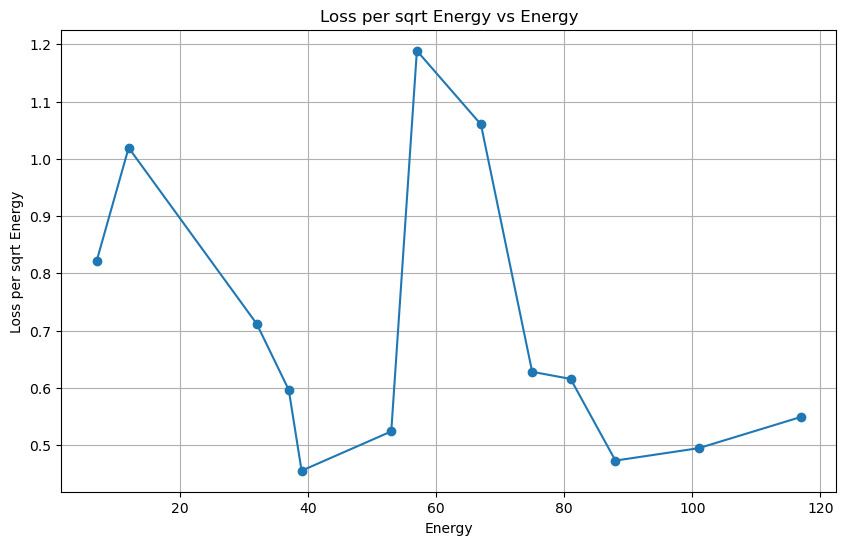

In [17]:
prediction_test_df, mean_prediction_loss_test = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed)

     trajectory_id      energy  variance_loss  variance_per_sqrt_energy
7                7    7.000942       0.367247                  0.138797
12              12   12.000901       5.588081                  1.613080
32              32   32.000736       0.952441                  0.168367
37              37   37.000694       1.872962                  0.307910
39              39   39.000678       1.098849                  0.175955
53              53   53.000562       0.211376                  0.029035
57              57   57.000529       5.022447                  0.665236
67              67   67.000446       2.080769                  0.254206
75              75   75.000380       0.775349                  0.089529
81              81   81.000331       0.070671                  0.007852
88              88   88.000273       1.932432                  0.205998
101            101  101.000165       0.768080                  0.076427
117            117  117.000033       3.018413                  0

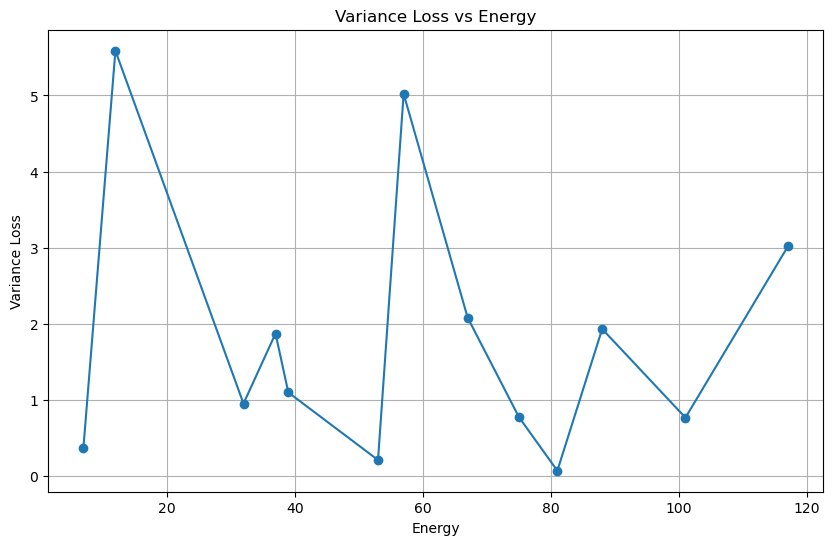

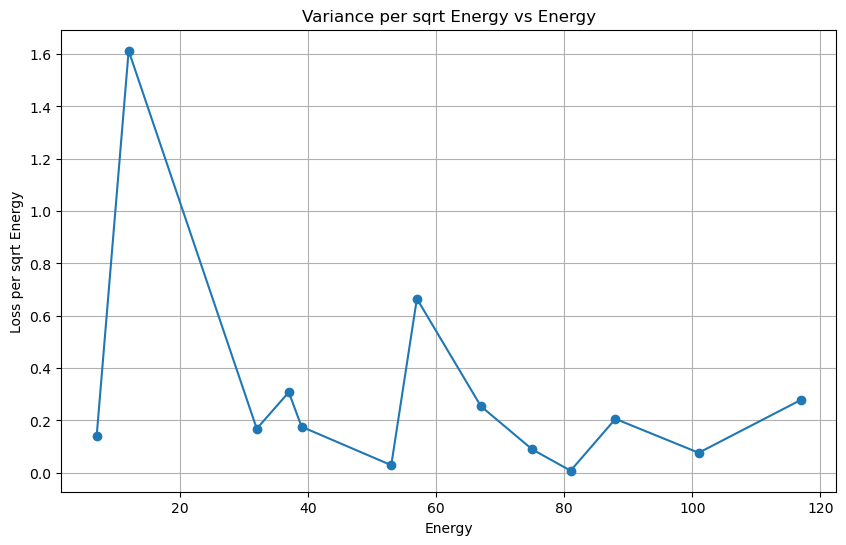

In [18]:
variance_test_df, mean_variance_loss_test = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df, test_df=test_df, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


Observed time points: [0.        3.1415927 6.2831855]


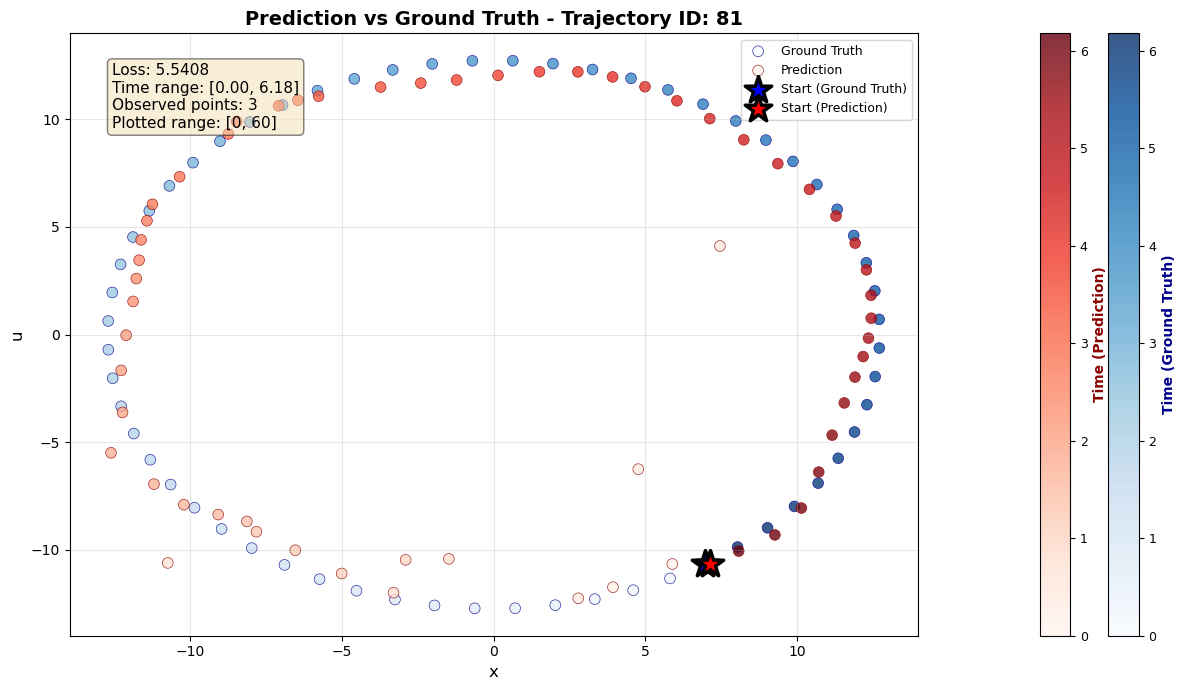

In [36]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df, test_df=test_df, trajectory_id=81, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,60])

    trajectory_id      energy  prediction_loss  loss_per_sqrt_energy
2               2  129.709677         3.116310              0.273624
4               4  138.419355         4.287146              0.364393
5               5  142.774194         3.648598              0.305352
6               6  147.129032         2.539364              0.209351
9               9  160.193548         2.779505              0.219606
10             10  164.548387         8.093256              0.630923
12             12  173.258065         6.869985              0.521926
14             14  181.967742         5.964221              0.442137
15             15  186.322581        12.536607              0.918433
17             17  195.032258        22.605526              1.618681
19             19  203.741935        11.474236              0.803866
20             20  208.096774         8.570860              0.594144
22             22  216.806452        24.421730              1.658595
26             26  234.225806     

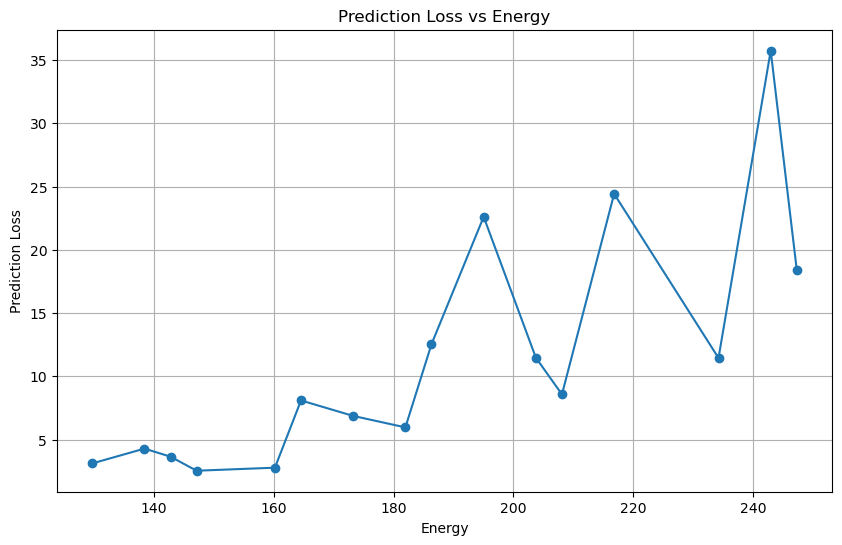

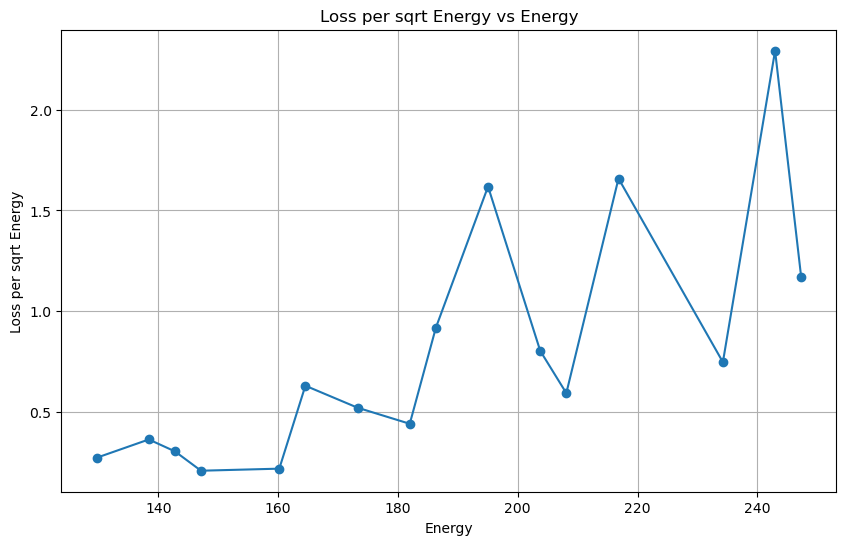

In [20]:
prediction_test_high_energy_df, mean_prediction_loss_test_high_energy = test_model_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed)

    trajectory_id      energy  variance_loss  variance_per_sqrt_energy
2               2  129.709677       4.901630                  0.430382
4               4  138.419355       3.739710                  0.317863
5               5  142.774194      11.257569                  0.942149
6               6  147.129032       2.646276                  0.218165
9               9  160.193548       9.537968                  0.753587
10             10  164.548387       9.406460                  0.733296
12             12  173.258065       8.969446                  0.681426
14             14  181.967742       0.968542                  0.071799
15             15  186.322581      30.387470                  2.226188
17             17  195.032258      27.350613                  1.958456
19             19  203.741935     631.103210                 44.214038
20             20  208.096774      37.638565                  2.609158
22             22  216.806452     153.745636                 10.441591
26    

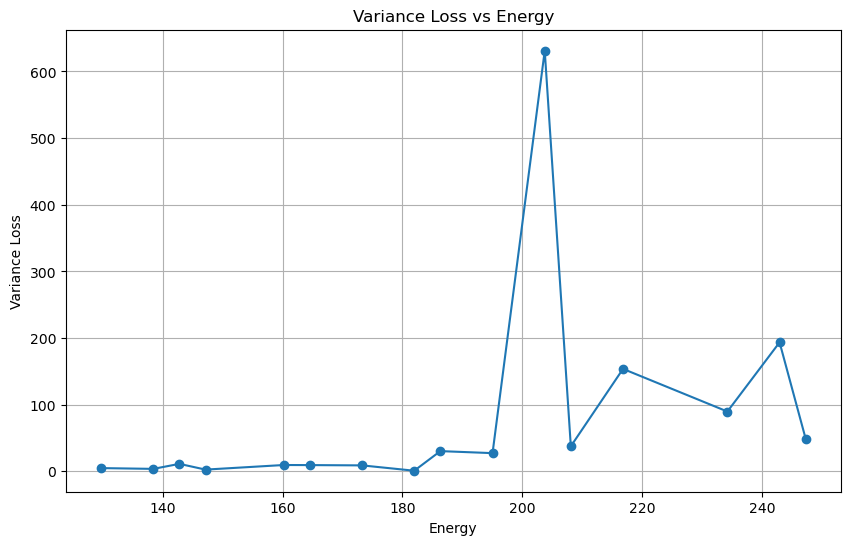

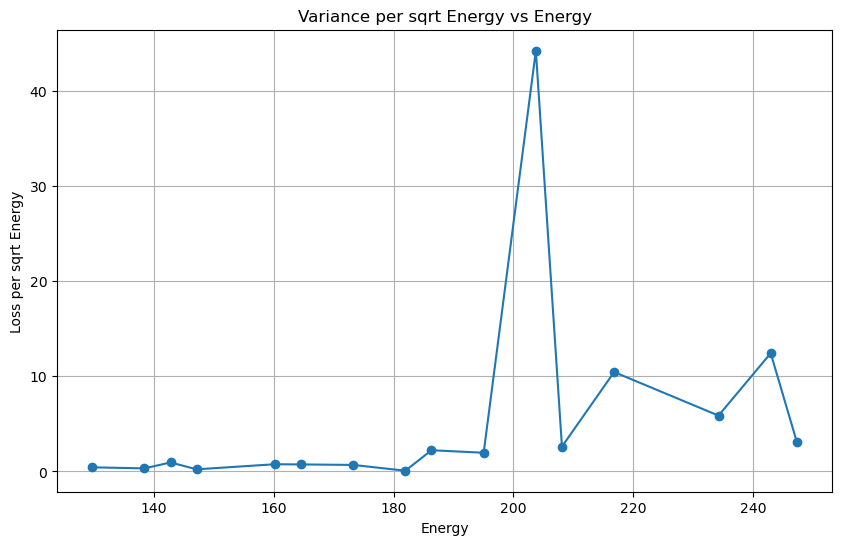

In [21]:
variance_test_high_energy_df, mean_variance_loss_test_high_energy = test_model_variance_in_all_trajectories_in_df(get_data_from_trajectory_id_function=get_data_from_trajectory_id, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, mapping_net=mapping_net, device=device, point_indexes_observed=point_indexes_observed)


Observed time points: [0.        3.1415927 6.2831855]


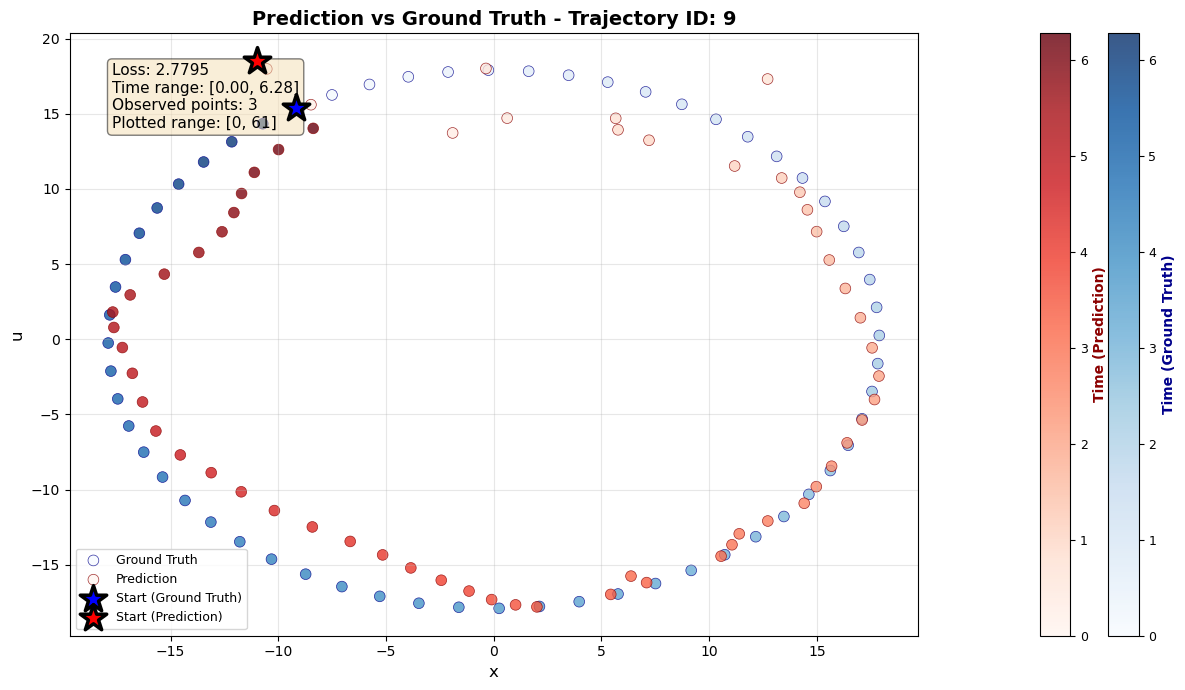

In [29]:
test_model_in_single_trajectory(get_data_from_trajectory_id_function=get_data_from_trajectory_id, prediction_loss_function=prediction_loss_euclidean, test_id_df=test_id_df_high_energy_revised, test_df=test_df_high_energy_revised, trajectory_id=9, mapping_net=mapping_net, inverse_net=inverse_net, device=device, point_indexes_observed=point_indexes_observed, connect_points=False, portion_to_visualize=[0,61])

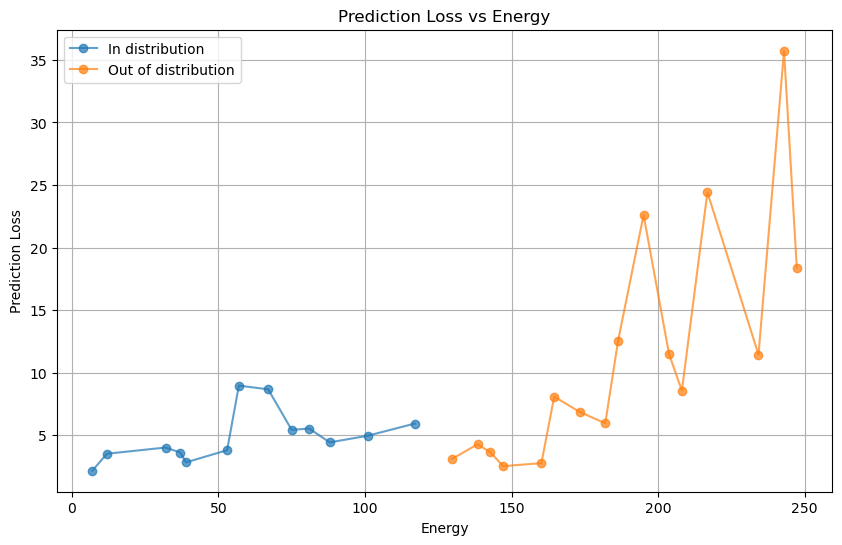

In [23]:
plot_prediction_losses([prediction_test_df, prediction_test_high_energy_df])

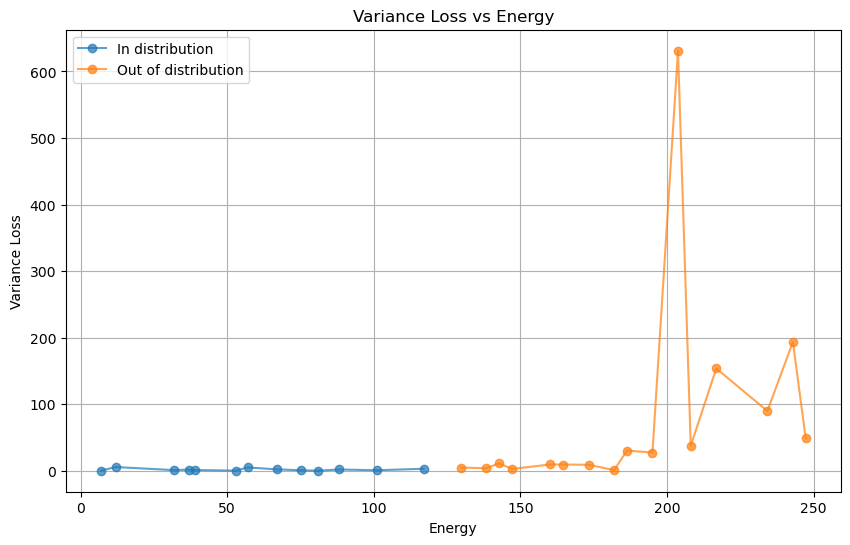

In [24]:
plot_variance_losses([variance_test_df, variance_test_high_energy_df])

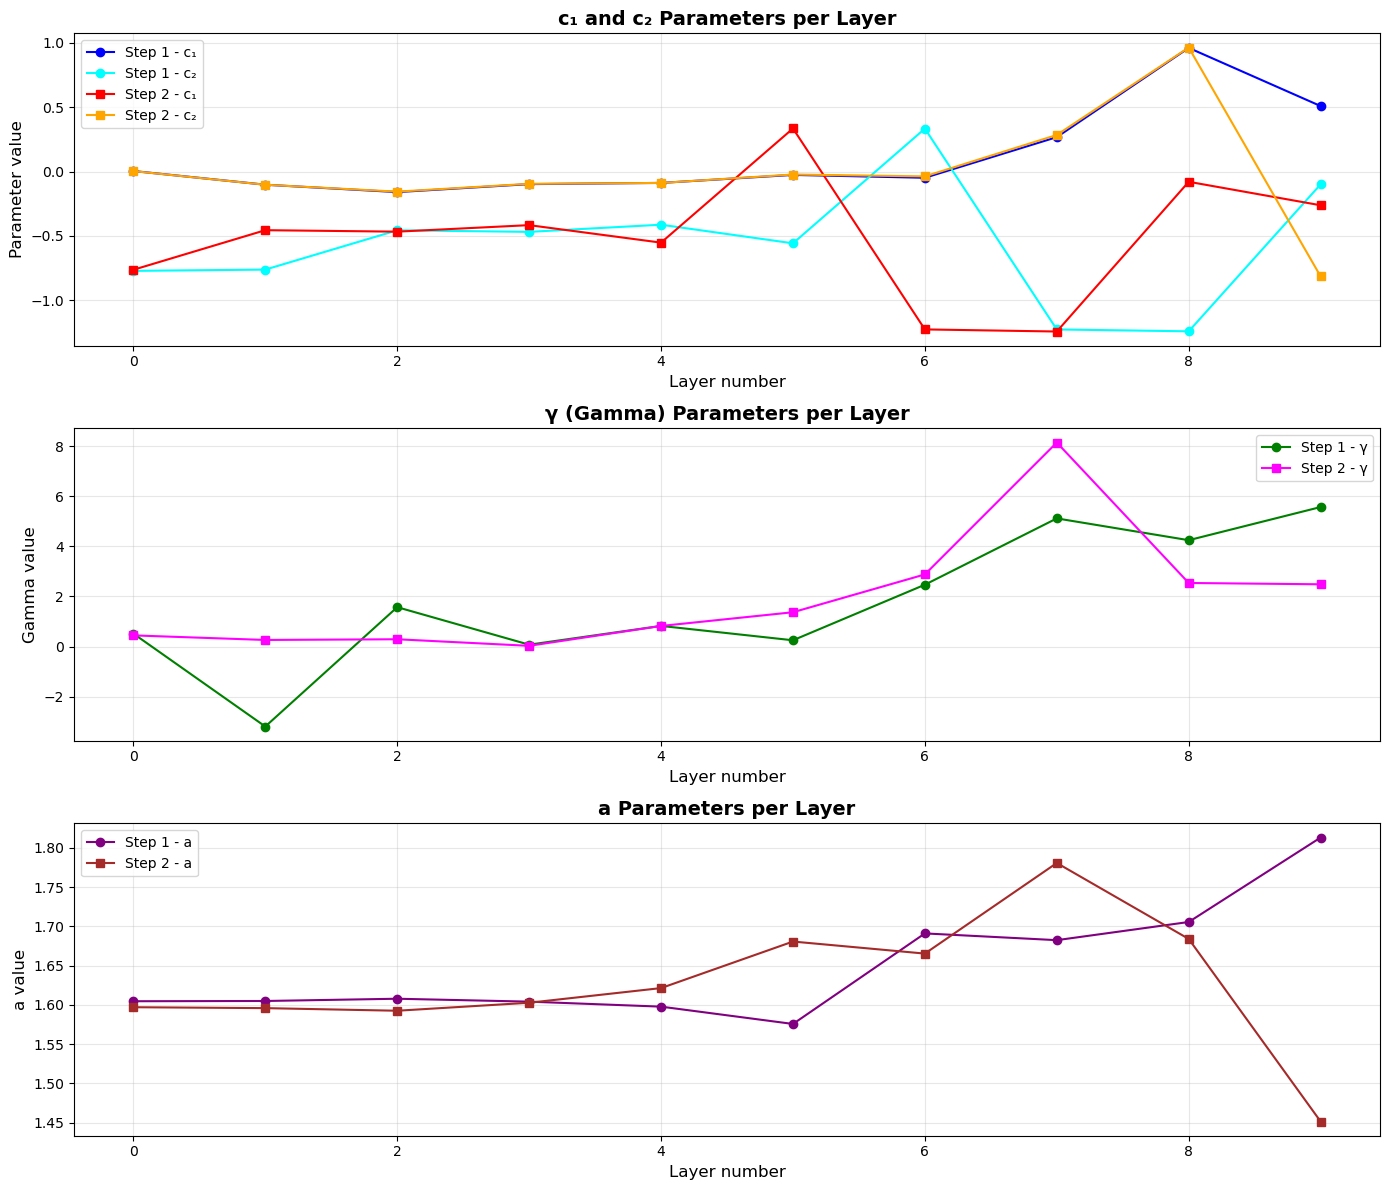

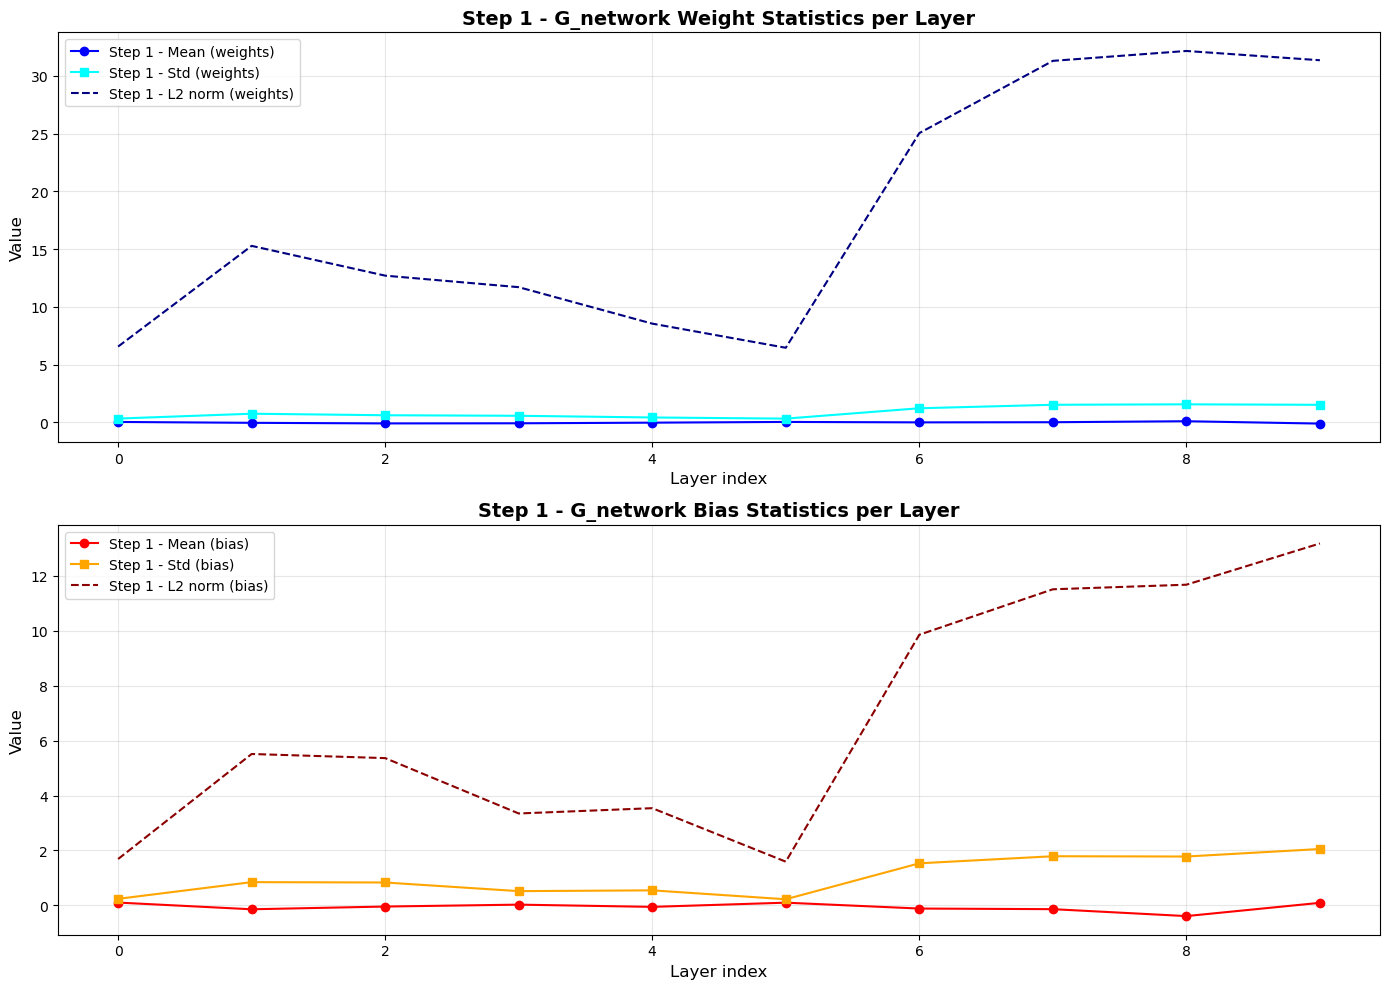

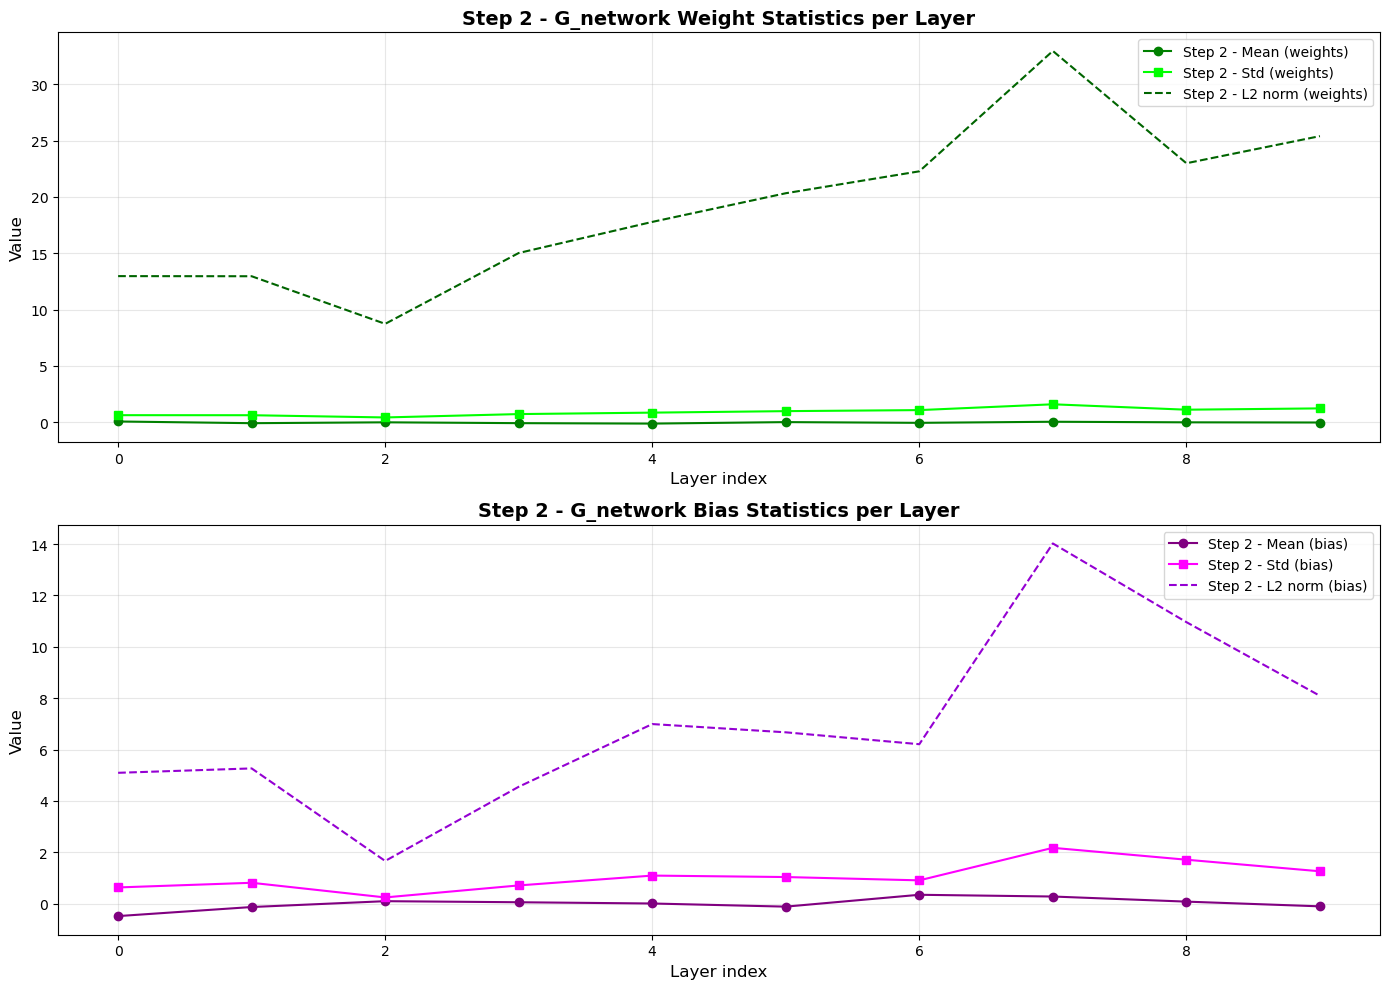

In [30]:
param_data = analyze_mapping_net(mapping_net, return_lists=True)


In [35]:
np.array(param_data['step_1_gamma_values']).mean()

np.float64(3.5735241889953615)

In [36]:
np.array(param_data['step_1_gamma_values']).std()

np.float64(1.978155649466863)

In [32]:
np.array(param_data['step_2_gamma_values']).mean()

np.float64(1.9264242181554436)

In [33]:
np.array(param_data['step_2_gamma_values']).std()

np.float64(2.301203274561747)

In [22]:
    mapping_net_test = SimpleStackedHamiltonianNetwork(
        #Hpw many Step_1 + Step_2 layers to stack
        n_layers=3,
        # MLP Architecture parameters
        hidden_dims= [38, 38],
        n_hidden_layers = None,   #Leave None if you provide list on hidden_dims
        
        # Activation parameters
        activation = 'gelu',
        activation_params = None,
        final_activation = None,   #Final layer activation function
        final_activation_only_on_final_layer = True,
        tanh_wrapper = False,
        
        # Initialization parameters
        weight_init = 'orthogonal',
        weight_init_params = {'gain': 1},
        bias_init = 'zeros',
        bias_init_value = 0.0,
        
        
        # Architectural choices
        use_bias = True,
        use_layer_norm = False,
        
        # Input/Output parameters
        input_dim = 2,  # x or u and t
        output_dim = 1,  # scalar G or F
        a_eps_min= 0.5,  # Minimum value for a
        a_eps_max= 2,  # Maximum value for a  
        a_k= 0.1,

        step_1_a_mean_innit= 1.0,
        step_2_a_mean_innit= 1.0,
        std_to_mean_ratio_a_mean_init= 0.3,

        step_1_gamma_mean_innit= 3.5,
        step_2_gamma_mean_innit= 2.5,
        std_to_mean_ratio_gamma_mean_init= 0.3,

        step_1_c1_mean_innit= 0.0,
        step_2_c1_mean_innit= 0.0,
        std_to_mean_ratio_c1_mean_init= 0.0,

        step_1_c2_mean_innit= 0.0,
        step_2_c2_mean_innit= 0.0,
        std_to_mean_ratio_c2_mean_init= 0.0,

        bound_innit=0.0,
    )
    

In [23]:
count_parameters(mapping_net_test)

9834

In [67]:
count_parameters(mapping_net_test)

15260